# Wine Quality Prediction 
This notebook predicts whether a wine is **good** (quality ≥ 7) using basic machine learning models.

## 1. Project Overview
- **Goal:** Classify wines as *Good* (quality ≥7) or *Not Good*.
- **Dataset:** Wine chemical properties and quality ratings.
- **Models Used:** Logistic Regression, Random Forest.
- **Libraries:** pandas, matplotlib, seaborn, scikit-learn.

## 2. Load and Explore Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3,0.45,8.8,6
1,white,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.9940,3.3,0.49,9.5,6
2,white,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,6


In [2]:
# Basic information
df.info()
df.describe().T.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type                   6497 non-null   object 
 1    fixed acidity         6497 non-null   object 
 2    volatile acidity      6497 non-null   object 
 3    citric acid           6497 non-null   object 
 4    residual sugar        6497 non-null   object 
 5    chlorides             6497 non-null   object 
 6    free sulfur dioxide   6497 non-null   float64
 7    total sulfur dioxide  6497 non-null   float64
 8    density               6497 non-null   float64
 9    pH                    6497 non-null   object 
 10   sulphates             6497 non-null   object 
 11   alcohol               6497 non-null   float64
 12   quality               6497 non-null   int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 660.0+ KB


,count,mean,std,min,25%,50%,75%,max
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
alcohol,6497.0,10.491801,1.192712,8.00000,9.50000,10.30000,11.30000,14.90000
quality,6497.0,5.818378,0.873255,3.00000,5.00000,6.00000,6.00000,9.00000


## 3. Data Cleaning & Preprocessing
- Fill missing numeric values using median.
- Encode `type` column (white=1, red=0).
- Create new target column `good` (1 if quality ≥7 else 0).

In [3]:
from sklearn.impute import SimpleImputer
import numpy as np

# Clean column names
df.columns = [c.strip() for c in df.columns]

# Fill missing numeric values
num_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Encode type
if 'type' in df.columns:
    df['type'] = df['type'].astype(str).str.strip().str.lower()
    df['type_enc'] = df['type'].map({'white':1, 'red':0}).fillna(0).astype(int)
else:
    df['type_enc'] = 0

# Create target variable
df['good'] = (df['quality'] >= 7).astype(int)

df[['type', 'quality', 'good']].head()

,type,quality,good
0,white,6.0,0
1,white,6.0,0
2,white,6.0,0
3,white,6.0,0
4,white,6.0,0


## 4. Exploratory Data Analysis (EDA)
Let's visualize the class balance and a few key feature relationships.

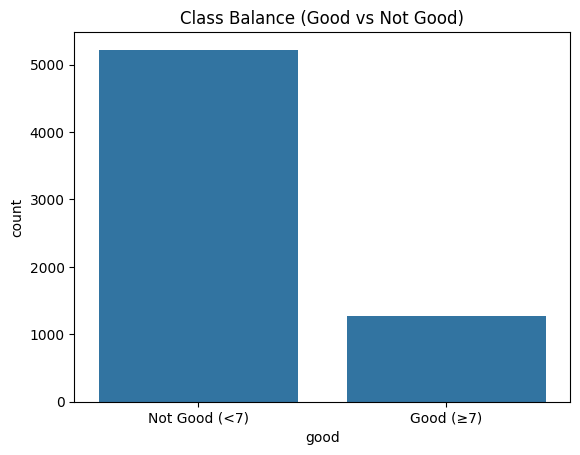

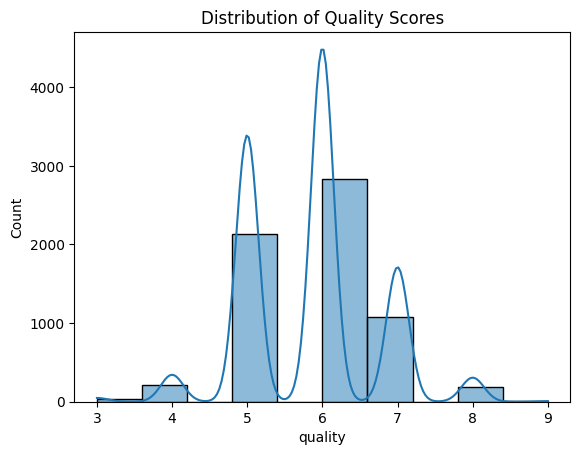

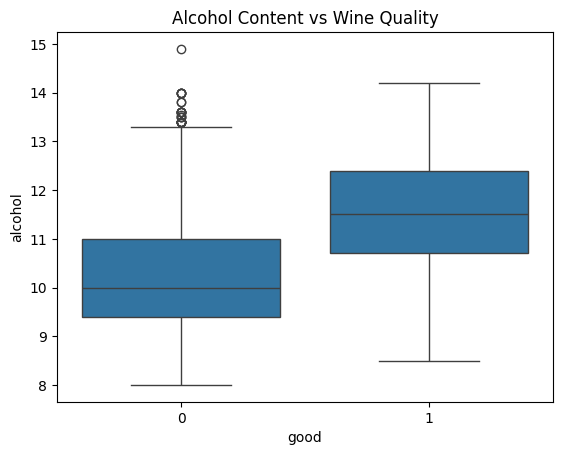

In [4]:
sns.countplot(x='good', data=df)
plt.title('Class Balance (Good vs Not Good)')
plt.xticks([0,1], ['Not Good (<7)', 'Good (≥7)'])
plt.show()

sns.histplot(df['quality'], kde=True, bins=10)
plt.title('Distribution of Quality Scores')
plt.show()

sns.boxplot(x='good', y='alcohol', data=df)
plt.title('Alcohol Content vs Wine Quality')
plt.show()

## 5. Model Building (Logistic Regression + Random Forest)
We will train two models and compare their performance.

In [ ]:
from sklearn.impute import SimpleImputer

# Normalize column names and strip whitespace in string cells
df.columns = [c.strip() for c in df.columns]

# Keep 'type' as categorical, convert all other columns to numeric where possible
for col in df.columns:
    if col == 'type':
        df['type'] = df['type'].astype(str).str.strip().str.lower()
        continue
    # strip and coerce to numeric (invalid parses become NaN)
    df[col] = pd.to_numeric(df[col].astype(str).str.strip().replace('', np.nan), errors='coerce')

# Now create encoded type and target
df['type_enc'] = df['type'].map({'white':1, 'red':0}).fillna(0).astype(int)
df['good'] = (df['quality'] >= 7).astype(int)

# Impute numeric NaNs with median
num_cols = df.select_dtypes(include=[np.number]).columns.drop(['quality','good'], errors='ignore')
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Quick check
print(df[num_cols].dtypes)
print(df[num_cols].isnull().sum().sum()) 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
type_enc                float64
dtype: object
0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Features and Target
X = df.drop(columns=['quality', 'good', 'type'])
y = df['good']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
lr = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)

lr.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

## 6. Model Evaluation
Compare models using Accuracy, Precision, Recall, and F1 Score.

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

models = {'Logistic Regression': lr, 'Random Forest': rf}
results = []

for name, model in models.items():
    preds = model.predict(X_test_scaled if name=='Logistic Regression' else X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    results.append([name, acc, prec, rec, f1])
    print(f"\n{name} Results:\n", classification_report(y_test, preds))

results_df = pd.DataFrame(results, columns=['Model','Accuracy','Precision','Recall','F1'])
results_df


Logistic Regression Results:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80      1044
           1       0.39      0.78      0.52       256

    accuracy                           0.72      1300
   macro avg       0.66      0.74      0.66      1300
weighted avg       0.82      0.72      0.75      1300


Random Forest Results:
               precision    recall  f1-score   support

           0       0.90      0.98      0.93      1044
           1       0.85      0.54      0.66       256

    accuracy                           0.89      1300
   macro avg       0.87      0.76      0.80      1300
weighted avg       0.89      0.89      0.88      1300



,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.718462,0.391732,0.777344,0.520942
1,Random Forest,0.890000,0.846626,0.539062,0.658711


## 7. Final Prediction Example

In [11]:
sample = X_test.iloc[[0]]
print('Sample features:\n', sample)

sample_scaled = scaler.transform(sample)
prob = rf.predict_proba(sample)[0,1]
pred = rf.predict(sample)[0]

print('\nPredicted Probability (Good):', prob)
print('Predicted Label:', 'Good' if pred==1 else 'Not Bad')

Sample features:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2318            7.5              0.26         0.59            11.8      0.046   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2318                 58.0                 164.0  0.99814  3.17       0.46   

      alcohol  type_enc  
2318      8.9       1.0  

Predicted Probability (Good): 0.005
Predicted Label: Not Bad


In [ ]:
# get probabilities for test set (LR uses scaled features)
probs_lr = lr.predict_proba(X_test_scaled)[:, 1]
probs_rf = rf.predict_proba(X_test)[:, 1]

def stats(name, probs):
    odds = np.where(probs>=1.0, np.inf, np.where(probs<=0.0, 0.0, probs / (1-probs)))
    print(f"\n{name} -- max prob: {probs.max():.6f}, min prob: {probs.min():.6f}, mean prob: {probs.mean():.6f}")
    print(f"{name} -- count prob>0.5: {(probs>0.5).sum()} / {len(probs)}")
    print(f"{name} -- max odds: {np.nanmax(odds[np.isfinite(odds)]):.6f}")
    # show top 5 highest probability samples
    top_idx = np.argsort(-probs)[:5]
    display(pd.DataFrame({
        'index': X_test.index[top_idx],
        'prob': probs[top_idx],
        'odds': odds[top_idx]
    }).reset_index(drop=True))

stats('Logistic Regression', probs_lr)
stats('Random Forest', probs_rf)

# If you want to force higher predicted probs for certain samples, inspect features of top samples:
top_rf_idx = np.argsort(-probs_rf)[:10]
print("\nTop RF sample features (highest predicted prob of 'good'):")
display(X_test.iloc[top_rf_idx])



Logistic Regression -- max prob: 0.969871, min prob: 0.003386, mean prob: 0.417984
Logistic Regression -- count prob>0.5: 508 / 1300
Logistic Regression -- max odds: 32.190161


,index,prob,odds
0,5040,0.969871,32.190161
1,1526,0.957902,22.754100
2,4818,0.956903,22.203705
3,3851,0.945192,17.245612
4,2872,0.931514,13.601532



Random Forest -- max prob: 1.000000, min prob: 0.000000, mean prob: 0.189323
Random Forest -- count prob>0.5: 163 / 1300
Random Forest -- max odds: 199.000000


C:\Users\Maheswaran\AppData\Local\Temp\ipykernel_14208\758167411.py:10: RuntimeWarning: divide by zero encountered in divide
  odds = np.where(probs>=1.0, np.inf, np.where(probs<=0.0, 0.0, probs / (1-probs)))


,index,prob,odds
0,4335,1.0,inf
1,4050,1.0,inf
2,2583,1.0,inf
3,3740,1.0,inf
4,4338,1.0,inf



Top RF sample features (highest predicted prob of 'good'):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_enc
4335,7.3,0.19,0.27,13.9,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,1.0
4050,7.4,0.16,0.27,15.5,0.050,25.0,135.0,0.99840,2.90,0.43,8.7,1.0
2583,6.8,0.18,0.30,12.8,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,1.0
3740,7.0,0.15,0.28,14.7,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,1.0
4338,7.3,0.19,0.27,13.9,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,1.0
2171,7.4,0.19,0.30,12.8,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,1.0
2167,7.4,0.19,0.30,12.8,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,1.0
2168,7.4,0.19,0.30,12.8,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,1.0
2994,6.8,0.18,0.28,9.8,0.039,29.0,113.0,0.99406,3.11,0.45,10.9,1.0
1682,7.2,0.25,0.28,14.4,0.055,55.0,205.0,0.99860,3.12,0.38,9.0,1.0


## 8. Conclusion & Next Steps
- **Best Model:** Random Forest (based on F1 score)
- **Next Steps:** Try cross-validation, hyperparameter tuning, and add SHAP explanations.
- This project is ready to upload to GitHub as a beginner-friendly ML project.